<a href="https://colab.research.google.com/github/yjyg1215/Project_MachineLearning/blob/main/anime_recsys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#주제: 머신러닝을 활용한 애니메이션 추천 시스템

##1. 기획 배경 및 문제 정의

애니메이션 시장은 굉장히 큼

최근들어 애니메이션 산업은 DVD 등의 매체를 통한 배급에서 OTT를 통한 배급으로 전환되는 추세임.

OTT를 통해 애니메이션을 시청하는 사람이 늘어나는 만큼, 추천시스템 기반을 잘 마련하여 이용자의 구독 이탈을 막는 것이 중요해짐.

가설
1. 원작 형태에 따라 유저들의 평점 평균이 다르다.
2. 애니메이션 타입에 따라 유저들의 평점 평균이 다르다.
3. 시청 상태별 인원수가 평가 점수에 영향을 준다.
4. 장르가 평가 점수에 영향을 준다.

##2. 전처리 및 EDA

In [102]:
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 8.2 MB/s 
     |████████████████████████████████| 303 kB 50.6 MB/s 
     |████████████████████████████████| 3.1 MB 40.5 MB/s 
     |████████████████████████████████| 102 kB 10.9 MB/s 
     |████████████████████████████████| 690 kB 54.6 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 296 kB 30.9 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ee40d699cb84a64be3504d175fa47c8921188e8f8e0442567f0b0acb9cc69d98
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: requests
    Found existing install

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline 

###1) anime.csv

* `MAL_ID`: MyAnimelist ID of the anime. (e.g. 1)
* `Name`: full name of the anime. (e.g. Cowboy Bebop)
* `Score`: average score of the anime given from all users in MyAnimelist database. (e.g. 8.78)
* `Genres`: comma separated list of genres for this anime. (e.g. Action, Adventure, Comedy, Drama, Sci-Fi, Space)
* `English name`: full name in english of the anime. (e.g. Cowboy Bebop)
* `Japanese name`: full name in japanses of the anime. (e.g. カウボーイビバップ)
* `Type`: TV, movie, OVA, etc. (e.g. TV)
* `Episodes`: number of chapters. (e.g. 26)
* `Aired`: broadcast date. (e.g. Apr 3, 1998 to Apr 24, 1999)
* `Premiered`: season premiere. (e.g. Spring 1998)
* `Producers`: comma separated list of produducers (e.g. Bandai Visual)
* `Licensors`: comma separated list of licensors (e.g. Funimation, Bandai Entertainment)
* `Studios`: comma separated list of studios (e.g. Sunrise)
* `Source`: Manga, Light novel, Book, etc. (e.g Original)
* `Duration`: duration of the anime per episode (e.g 24 min. per ep.)
* `Rating`: age rate (e.g. R - 17+ (violence & profanity))
* `Ranked`: position based in the score. (e.g 28)
* `Popularity`: position based in the the number of users who have added the anime to their list. (e.g 39)
* `Members`: number of community members that are in this anime's "group". (e.g. 1251960)
* `Favorites`: number of users who have the anime as "favorites". (e.g. 61,971)
* `Watching`: number of users who are watching the anime. (e.g. 105808)
* `Completed`: number of users who have complete the anime. (e.g. 718161)
* `On-Hold`: number of users who have the anime on Hold. (e.g. 71513)
* `Dropped`: number of users who have dropped the anime. (e.g. 26678)
* `Plan to Watch`: number of users who plan to watch the anime. (e.g. 329800)
* `Score-10`: number of users who scored 10. (e.g. 229170)
* `Score-9`: number of users who scored 9. (e.g. 182126)
* `Score-8`: number of users who scored 8. (e.g. 131625)
* `Score-7`: number of users who scored 7. (e.g. 62330)
* `Score-6`: number of users who scored 6. (e.g. 20688)
* `Score-5`: number of users who scored 5. (e.g. 8904)
* `Score-4`: number of users who scored 4. (e.g. 3184)
* `Score-3`: number of users who scored 3. (e.g. 1357)
* `Score-2`: number of users who scored 2. (e.g. 741)
* `Score-1`: number of users who scored 1. (e.g. 1580)

In [3]:
anime=pd.read_csv("/content/drive/MyDrive/archive/anime.csv")

df_anime=anime.copy()
df_anime.head().T

,0,1,2,3,4
MAL_ID,1,5,6,7,8
Name,Cowboy Bebop,Cowboy Bebop: Tengoku no Tobira,Trigun,Witch Hunter Robin,Bouken Ou Beet
Score,8.78,8.39,8.24,7.27,6.98
Genres,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","Action, Drama, Mystery, Sci-Fi, Space","Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Action, Mystery, Police, Supernatural, Drama, ...","Adventure, Fantasy, Shounen, Supernatural"
English name,Cowboy Bebop,Cowboy Bebop:The Movie,Trigun,Witch Hunter Robin,Beet the Vandel Buster
Japanese name,カウボーイビバップ,カウボーイビバップ 天国の扉,トライガン,Witch Hunter ROBIN (ウイッチハンターロビン),冒険王ビィト
Type,TV,Movie,TV,TV,TV
Episodes,26,1,26,26,52
Aired,"Apr 3, 1998 to Apr 24, 1999","Sep 1, 2001","Apr 1, 1998 to Sep 30, 1998","Jul 2, 2002 to Dec 24, 2002","Sep 30, 2004 to Sep 29, 2005"
Premiered,Spring 1998,Unknown,Spring 1998,Summer 2002,Fall 2004


In [3]:
print("anime's shape: ",df_anime.shape)

anime's shape:  (17562, 35)


In [4]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [4]:
#수치형 데이터인데 데이터타입이 object인 컬럼은 int 및 float로 변환

scores=['Score-1','Score-2','Score-3','Score-4','Score-5','Score-6','Score-7','Score-8','Score-9','Score-10']
df_anime=df_anime.replace("Unknown",'0')
for col in scores:
  df_anime[col]=df_anime[col].apply(lambda x: x.replace(".0",""))
df_anime['Score']=df_anime['Score'].astype(float)
df_anime['Episodes']=df_anime['Episodes'].astype(int)
df_anime['Score-1']=df_anime['Score-1'].astype(int)
df_anime['Score-2']=df_anime['Score-2'].astype(int)
df_anime['Score-3']=df_anime['Score-3'].astype(int)
df_anime['Score-4']=df_anime['Score-4'].astype(int)
df_anime['Score-5']=df_anime['Score-5'].astype(int)
df_anime['Score-6']=df_anime['Score-6'].astype(int)
df_anime['Score-7']=df_anime['Score-7'].astype(int)
df_anime['Score-8']=df_anime['Score-8'].astype(int)
df_anime['Score-9']=df_anime['Score-9'].astype(int)
df_anime['Score-10']=df_anime['Score-10'].astype(int)

df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MAL_ID         17562 non-null  int64  
 1   Name           17562 non-null  object 
 2   Score          17562 non-null  float64
 3   Genres         17562 non-null  object 
 4   English name   17562 non-null  object 
 5   Japanese name  17562 non-null  object 
 6   Type           17562 non-null  object 
 7   Episodes       17562 non-null  int64  
 8   Aired          17562 non-null  object 
 9   Premiered      17562 non-null  object 
 10  Producers      17562 non-null  object 
 11  Licensors      17562 non-null  object 
 12  Studios        17562 non-null  object 
 13  Source         17562 non-null  object 
 14  Duration       17562 non-null  object 
 15  Rating         17562 non-null  object 
 16  Ranked         17562 non-null  object 
 17  Popularity     17562 non-null  int64  
 18  Member

In [5]:
#Genre 컬럼 나누기

genres=['Action', 'Adventure','Comedy',
    'Slice of Life','Drama','Sci-Fi',
    'Game','Harem','Military','Space','Music', 'Mecha',
     'Historical', 'Mystery', 'School', 'Hentai', 'Fantasy', 'Horror',
     'Kids', 'Sports', 'Magic', 'Romance']

for genre in genres:
  df_anime[genre]=[0]*len(df_anime)
  df_anime.loc[df_anime['Genres'].str.contains(genre,na=False),genre]=1

In [6]:
#Premiered 컬럼 연도와 계절로 나누기

df_anime['Year']=df_anime['Premiered'].apply(lambda x: x[-4:])
df_anime['Season']=df_anime['Premiered'].apply(lambda x: x[:-5])

In [7]:
#Year 컬럼 조건부로 결측치 채우기

for i in df_anime.index:
  if df_anime.loc[i,'Year']=='0':
    tmp=df_anime.loc[i,'Aired'].split(' ')
    for j in range(len(tmp)):
      if len(tmp[j])==4:
        if ',' in tmp[j]:
          continue
        df_anime.loc[i,'Year']=tmp[j]
        break

In [8]:
#Year 컬럼 데이터타입 int로 변환 후 10년단위로 나누기

df_anime['Year']=df_anime['Year'].astype(int)

for i in df_anime.index:
  if df_anime.loc[i,'Year']==0:
    continue
  elif df_anime.loc[i,'Year']<1920:
    df_anime.loc[i,'Year']=1910
  elif df_anime.loc[i,'Year']<1930:
    df_anime.loc[i,'Year']=1920
  elif df_anime.loc[i,'Year']<1940:
    df_anime.loc[i,'Year']=1930
  elif df_anime.loc[i,'Year']<1950:
    df_anime.loc[i,'Year']=1940
  elif df_anime.loc[i,'Year']<1960:
    df_anime.loc[i,'Year']=1950
  elif df_anime.loc[i,'Year']<1970:
    df_anime.loc[i,'Year']=1960
  elif df_anime.loc[i,'Year']<1980:
    df_anime.loc[i,'Year']=1970
  elif df_anime.loc[i,'Year']<1990:
    df_anime.loc[i,'Year']=1980
  elif df_anime.loc[i,'Year']<2000:
    df_anime.loc[i,'Year']=1990
  elif df_anime.loc[i,'Year']<2010:
    df_anime.loc[i,'Year']=2000
  elif df_anime.loc[i,'Year']<2020:
    df_anime.loc[i,'Year']=2010
  else:
    df_anime.loc[i,'Year']=2020

In [10]:
df_anime['Year'].unique()

array([1990, 2000, 1980, 1970, 1960, 1940, 2010,    0, 1930, 1920, 1950,
       1910, 2020])

In [9]:
#Duration 컬럼 단위를 분으로 나타내기

du=[]
for row in df_anime['Duration']:
  tmp=row.split(' ')
  min=0
  for i in range(len(tmp)):
    if tmp[i]=='hr.':
      min=min+60*int(tmp[i-1])
    elif tmp[i]=='min.':
      min=min+int(tmp[i-1])
  du.append(min)

df_anime['Duration']=du
df_anime['Duration'].head()

0     24
1    115
2     24
3     25
4     23
Name: Duration, dtype: int64

In [10]:
#Score 컬럼 결측치 조건부로 채우기

scores=['Score-1','Score-2','Score-3','Score-4','Score-5','Score-6','Score-7','Score-8','Score-9','Score-10']
for i in df_anime.index:
  if df_anime.loc[i,'Score']==0:
    sum=0
    n=0
    for j in range(10):
      n+=df_anime.loc[i,scores[j]]
      sum+=(df_anime.loc[i,scores[j]])*(j+1)
    if n!=0:
      df_anime.loc[i,'Score']=sum/n

In [13]:
# #Episodes 컬럼 범위별로 묶어주기 (1:0,2~8:1,9~20:2,21~30:3,31~:4)

# ep=[]
# for row in df_anime['Episodes']:
#   if row==1:
#     ep.append(0)
#   elif row<9:
#     ep.append(1)
#   elif row<21:
#     ep.append(2)
#   elif row<31:
#     ep.append(3)
#   else:
#     ep.append(4)

# df_anime['Episodes']=ep
# df_anime['Episodes'].unique()

In [14]:
#Studios 카디널리티 확인

df_anime['Studios'].nunique()

1090

In [15]:
#1차적으로 필요하지 않은 컬럼들은 drop

df_anime.drop(columns=['Name','English name','Japanese name'],inplace=True) #MAL_ID가 있으므로 이름 관련 컬럼은 drop
df_anime.drop('Aired',axis=1,inplace=True) #Premiered와 비슷한 내용이므로 drop
df_anime.drop('Premiered',axis=1,inplace=True) #Premiered를 Year과 Season으로 나눠줬으므로 drop
df_anime.drop('Ranked',axis=1,inplace=True) #Score 기반으로 순위를 매긴 것이므로 Score을 남겨두고 Ranked는 drop
df_anime.drop('Genres',axis=1,inplace=True) #장르 각각 새로운 컬럼으로 나눠줬으므로 기존의 Genres는 drop
df_anime.drop('Licensors',axis=1,inplace=True) #Licensors를 활용해보고 싶었으나 이미 컬럼의 수가 많기도 하고, 상대적으로 중요도가 떨어질 것으로 예상되어 drop
df_anime.drop('Producers',axis=1,inplace=True) #Producers를 활용해보고 싶었으나, 어느 Producer가 기여도가 높은지 알 수 없어 전처리하기 어려울 것으로 판단되므로 drop
df_anime.drop('Episodes',axis=1,inplace=True) #Episodes는 카디널리티가 높고, 범위를 나누어 인코딩해도 타겟과의 연관성이 낮은 것으로 보이므로 drop
df_anime.drop('Season',axis=1,inplace=True) #Season은 결측치가 많고, 공개일에 대한 계절인지 최종화에 대한 계절인지 알 수 없으며 1년 이상 연재된 경우 계절이 갖는 의미가 없을 것으로 판단되어 drop
df_anime.drop('Studios',axis=1,inplace=True) #Studios는 카디널리티가 높으므로 drop

In [16]:
df_anime.head().T

,0,1,2,3,4
MAL_ID,1,5,6,7,8
Score,8.78,8.39,8.24,7.27,6.98
Type,TV,Movie,TV,TV,TV
Source,Original,Original,Manga,Original,Manga
Duration,24,115,24,25,23
Rating,R - 17+ (violence & profanity),R - 17+ (violence & profanity),PG-13 - Teens 13 or older,PG-13 - Teens 13 or older,PG - Children
Popularity,39,518,201,1467,4369
Members,1251960,273145,558913,94683,13224
Favorites,61971,1174,12944,587,18
Watching,105808,4143,29113,4300,642


In [17]:
df_anime.nunique().sort_values(ascending=False)

MAL_ID           17562
Popularity       11755
Members           9508
Completed         7822
Plan to Watch     7055
Score-7           4933
Score-8           4515
Score-6           4236
Score-9           3645
Watching          3580
Score-10          3379
Score-5           3288
Score             3144
Dropped           3035
On-Hold           2915
Score-4           2235
Favorites         1543
Score-3           1506
Score-2           1110
Score-1           1084
Duration           150
Source              16
Year                13
Rating               7
Type                 7
Action               2
Historical           2
Romance              2
Magic                2
Sports               2
Kids                 2
Horror               2
Fantasy              2
Hentai               2
School               2
Mystery              2
Mecha                2
Adventure            2
Music                2
Military             2
Harem                2
Game                 2
Sci-Fi               2
Drama      

In [18]:
df_anime.describe()

,MAL_ID,Score,Duration,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,...,Mystery,School,Hentai,Fantasy,Horror,Kids,Sports,Magic,Romance,Year
count,17562.000000,17562.000000,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,...,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000
mean,21477.192347,6.123983,23.757545,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,...,0.041396,0.093497,0.076757,0.187052,0.026307,0.151748,0.040599,0.061553,0.108131,1965.284706
std,14900.093170,1.296979,25.096817,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,...,0.199210,0.291136,0.266212,0.389964,0.160051,0.358787,0.197365,0.240349,0.310555,263.433850
min,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5953.500000,5.492537,4.000000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1990.000000
50%,22820.000000,6.230000,23.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
75%,35624.750000,6.920000,27.000000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
max,48492.000000,10.000000,167.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2020.000000


###2) rating_complete.csv

* `user_id`: non identifiable randomly generated user id.
* `anime_id`: - MyAnimelist ID of the anime that this user has rated.
* `rating`: rating that this user has assigned.

In [11]:
rating=pd.read_csv("/content/drive/MyDrive/archive/rating_complete.csv")
rating.shape

(57633278, 3)

In [12]:
df_rating=rating.copy()

df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


In [21]:
df_rating.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


In [22]:
df_rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [23]:
df_rating.duplicated().sum()

0

In [24]:
ra_mean=df_rating.groupby('user_id').mean()

In [25]:
df_rating.nunique().sort_values(ascending=False)

user_id     310059
anime_id     16872
rating          10
dtype: int64

In [26]:
ra_mean.describe()['rating']

count    310059.000000
mean          7.927370
std           0.942954
min           1.000000
25%           7.372807
50%           7.916667
75%           8.500000
max          10.000000
Name: rating, dtype: float64

In [27]:
ra_count=df_rating.groupby('user_id').count()

In [28]:
ra_count['anime_id'].max()

15455

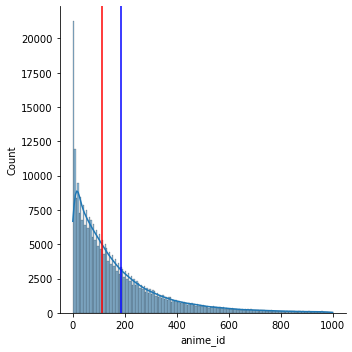

In [29]:
sns.displot(ra_count[ra_count['anime_id']<1000].anime_id,kde=True)
plt.axvline(ra_count['anime_id'].mean(),color='blue')
plt.axvline(ra_count['anime_id'].median(),color='red')
plt.show()

-> 평균적으로 한 유저당 200개 정도의 애니메이션을 평가함.

In [30]:
#코랩에서 5700만개의 데이터를 다루려니 계속 초기화돼서 100만개정도로 추려보기로 함.

df_rating=df_rating.sample(frac=0.02)

In [31]:
df_rating.nunique()

user_id     232127
anime_id     13111
rating          10
dtype: int64

In [32]:
df_rating.shape

(1152666, 3)

In [33]:
ra_count=df_rating.groupby('user_id').count()
ra_count['anime_id'].max()

316

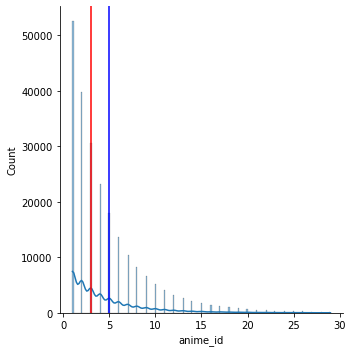

In [34]:
sns.displot(ra_count[ra_count['anime_id']<30].anime_id,kde=True)
plt.axvline(ra_count['anime_id'].mean(),color='blue')
plt.axvline(ra_count['anime_id'].median(),color='red')
plt.show()

In [13]:
#해당 유저가 평가한 모든 점수의 평균을 user_mean 이라는 새로운 컬럼으로 추가

df_rating['user_mean'] = df_rating.groupby('user_id')['rating'].transform('mean')

###3) anime+rating_complete

In [36]:
df_anime.columns

Index(['MAL_ID', 'Score', 'Type', 'Source', 'Duration', 'Rating', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'Action',
       'Adventure', 'Comedy', 'Slice of Life', 'Drama', 'Sci-Fi', 'Game',
       'Harem', 'Military', 'Space', 'Music', 'Mecha', 'Historical', 'Mystery',
       'School', 'Hentai', 'Fantasy', 'Horror', 'Kids', 'Sports', 'Magic',
       'Romance', 'Year'],
      dtype='object')

In [ ]:
df=df_anime.merge(df_rating,left_on='MAL_ID',right_on='anime_id',how='inner')
df.shape

In [38]:
profile = ProfileReport(df, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

-> Studios 컬럼은 카디널리티가 높아서 drop하는 게 좋을 듯함. Year 컬럼과 Season 컬럼은 Aired 컬럼에서 조건부로 결측치를 채워줘야 할 듯. 그리고 Year 컬럼은 카디널리티를 줄이기 위해 10년 단위로 나눠서 인코딩하기.

In [39]:
df.head().T

,0,1,2,3,4
MAL_ID,1,1,1,1,1
Score,8.78,8.78,8.78,8.78,8.78
Type,TV,TV,TV,TV,TV
Source,Original,Original,Original,Original,Original
Duration,24,24,24,24,24
Rating,R - 17+ (violence & profanity),R - 17+ (violence & profanity),R - 17+ (violence & profanity),R - 17+ (violence & profanity),R - 17+ (violence & profanity)
Popularity,39,39,39,39,39
Members,1251960,1251960,1251960,1251960,1251960
Favorites,61971,61971,61971,61971,61971
Watching,105808,105808,105808,105808,105808


In [40]:
df.corr()['rating'].sort_values(ascending=False)

rating           1.000000
user_mean        0.654292
Score            0.459920
Plan to Watch    0.274478
Score-9          0.252733
Members          0.236433
Score-10         0.233752
Score-8          0.229200
Completed        0.219907
Favorites        0.209377
On-Hold          0.202029
Watching         0.199899
Score-7          0.153635
Drama            0.105385
Dropped          0.103923
Duration         0.094581
Score-6          0.074784
Mystery          0.066684
Military         0.051286
Historical       0.047586
Slice of Life    0.042731
Adventure        0.032880
Score-5          0.031128
Action           0.029313
Sports           0.024826
Year             0.011710
School           0.009894
Sci-Fi           0.009001
Magic            0.008870
Space            0.007475
Comedy           0.003888
Mecha            0.003524
Score-1          0.002718
Game             0.000434
user_id         -0.001117
Fantasy         -0.001864
Romance         -0.003506
Score-4         -0.004751
Music       

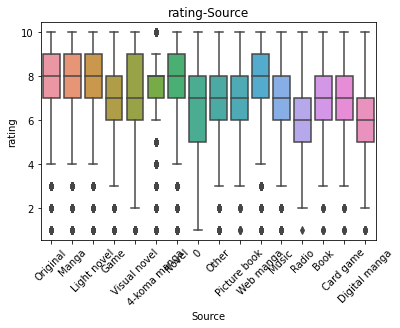

In [41]:
#범주형 컬럼 Source와 타겟간의 관계

sns.boxplot(data=df, x='Source', y='rating')
plt.title('rating-Source')
plt.xticks(rotation=45)

plt.show()

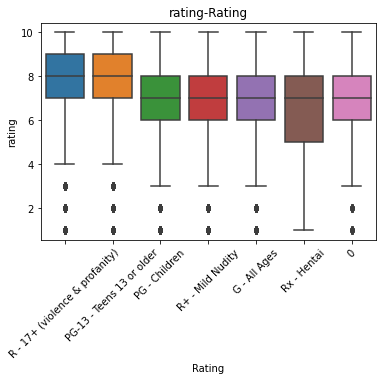

In [42]:
#범주형 컬럼 Rating과 타겟간의 관계

sns.boxplot(data=df, x='Rating', y='rating')
plt.title('rating-Rating')
plt.xticks(rotation=45)

plt.show()

In [43]:
# # 수치형 컬럼과 타겟과의 관계

# sns.scatterplot(data=df, x='GrLivArea', y='rating')
# plt.title('SalePrice - OverallQual')

# plt.show()

In [ ]:
#유저가 8점 이상의 점수를 부여했는지를 저장할 컬럼 (타겟)

eight=[]
for i in df.index:
  if df.loc[i,'rating']>=8:
    eight.append(1)
  else:
    eight.append(0)

df['eight']=eight

###4) EDA

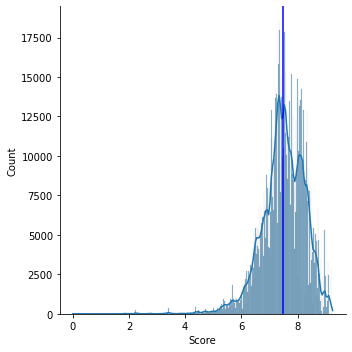

In [45]:
#df Score 분포

sns.displot(df['Score'], kde=True)
plt.axvline(df['Score'].mean(), color='blue')
# plt.axvline(df['Score'].median(), color='red')
plt.show()

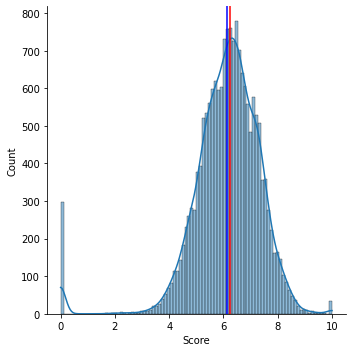

In [46]:
#df_anime Score 분포

sns.displot(df_anime['Score'],kde=True)
plt.axvline(df_anime['Score'].mean(),color='blue')
plt.axvline(df_anime['Score'].median(),color='red')
plt.show()

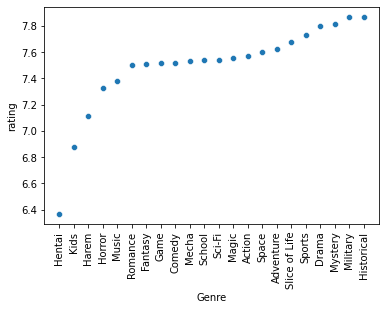

In [47]:
#Genre별 rating 평균

genres=['Action', 'Adventure', 'Comedy', 'Slice of Life', 'Drama',
       'Sci-Fi', 'Game', 'Harem', 'Military', 'Space', 'Music', 'Mecha',
       'Historical', 'Mystery', 'School', 'Hentai', 'Fantasy', 'Horror',
       'Kids', 'Sports', 'Magic', 'Romance']

gr=[]
for genre in genres:
  gr.append(df[df[genre]==1].rating.mean())

genre_rating=pd.DataFrame()
genre_rating['Genre']=genres
genre_rating['rating']=gr

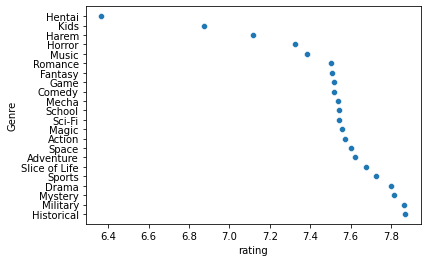

In [74]:
sns.scatterplot(data=genre_rating.sort_values('rating'),y='Genre',x='rating')
plt.show()

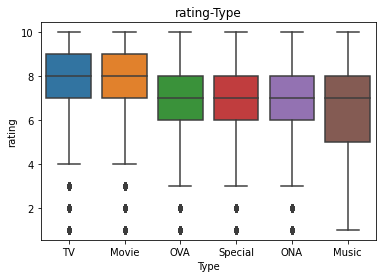

In [48]:
#Type별 rating 분포

sns.boxplot(data=df, x='Type', y='rating')
plt.title('rating-Type')

plt.show()

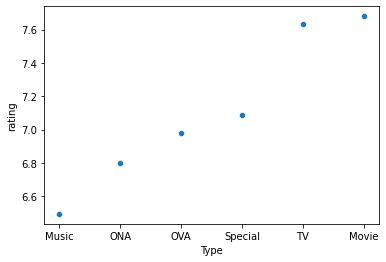

In [49]:
type_rating=df.groupby('Type').mean().rating.sort_values()

sns.scatterplot(data=type_rating)
plt.show()

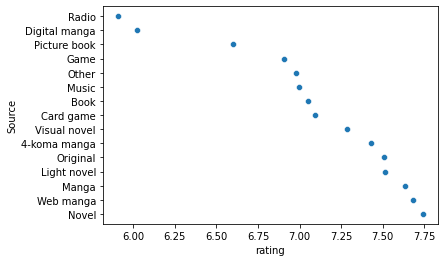

In [50]:
#Source별 rating 분포

source_rating=df.groupby('Source').mean().rating.sort_values()
source_rating.drop('0',inplace=True)

sns.scatterplot(data=source_rating,y=source_rating.index,x=source_rating)
plt.show()

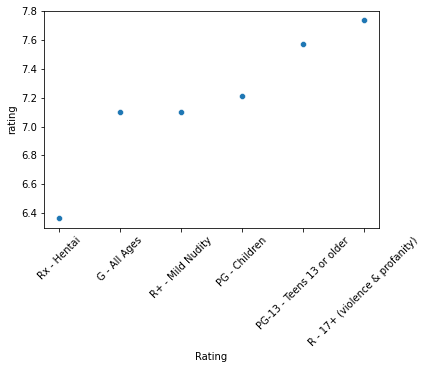

In [75]:
#Rating별 rating 분포

Rating_rating=df.groupby('Rating').mean().rating.sort_values()
Rating_rating.drop('0',inplace=True)
sns.scatterplot(data=Rating_rating)
plt.xticks(rotation=45)
plt.show()

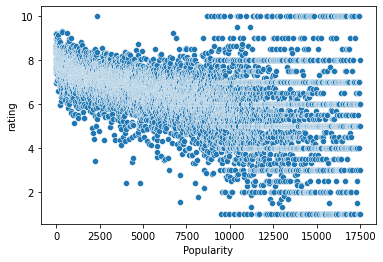

In [52]:
#Popularity과 rating

popularity_rating=df.groupby('Popularity').mean().rating

sns.scatterplot(data=popularity_rating)
plt.show()

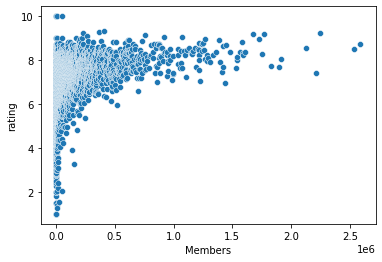

In [53]:
#Members와 rating

members_rating=df.groupby('Members').mean().rating

sns.scatterplot(data=members_rating)
plt.show()

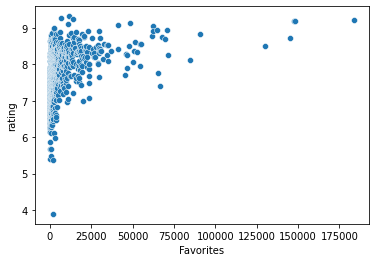

In [54]:
#Favorites과 rating

favorites_rating=df.groupby('Favorites').mean().rating

sns.scatterplot(data=favorites_rating)
plt.show()

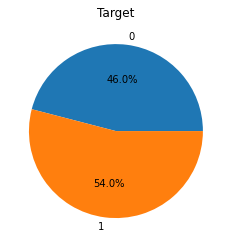

In [55]:
#타겟 분포

plt.pie([len(df[df['eight']==0]),len(df[df['eight']==1])], labels=[0,1], autopct='%.1f%%')
plt.title('Target')
plt.show()

In [56]:
# #시청 상태 총 인원수 컬럼 추가

# total=[]
# for i in df.index:
#   total.append(df.loc[i,'Watching']+df.loc[i,'Completed']+df.loc[i,'On-Hold']+df.loc[i,'Dropped']+df.loc[i,'Plan to Watch'])

# df['total']=total

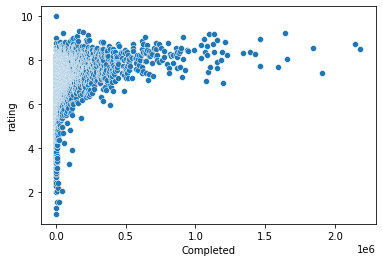

In [57]:
#Completed 비율과 rating

completed_rating=df.groupby('Completed').mean().rating

sns.scatterplot(data=completed_rating)
plt.show()

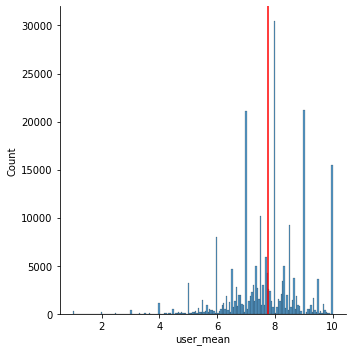

In [58]:
#user_mean 분포

um=df.groupby('user_id').mean()['user_mean']

sns.displot(um)
plt.axvline(um.mean(),color='red')
#plt.axvline(df['rating'].median(),color='red')
plt.show()

##3. 모델링

In [59]:
!pip3 install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
!pip3 install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

###1) XGBoost

In [62]:
#학습/검증/평가 데이터셋 나누기

target='eight'
features=['Score', 'Type', 'Source', 'Duration', 'Rating', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'Action',
       'Adventure', 'Comedy', 'Slice of Life', 'Drama', 'Sci-Fi', 'Game',
       'Harem', 'Military', 'Space', 'Music', 'Mecha', 'Historical', 'Mystery',
       'School', 'Hentai', 'Fantasy', 'Horror', 'Kids', 'Sports', 'Magic',
       'Romance', 'Year','user_mean']

train,test=train_test_split(df,train_size=0.80,test_size=0.20,stratify=df[target])
train,val=train_test_split(train,train_size=0.80,test_size=0.20,stratify=train[target])

X_train=train[features]
y_train=train[target]
X_val=val[features]
y_val=val[target]
X_test=test[features]
y_test=test[target]

In [63]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(737705, 47) (737705,)
(184427, 47) (184427,)
(230534, 47) (230534,)


In [79]:
#기준모델 설정

base=y_train.mode()[0]
baseline=[base]*len(y_train)

print(classification_report(y_train, baseline))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    338992
           1       0.54      1.00      0.70    398713

    accuracy                           0.54    737705
   macro avg       0.27      0.50      0.35    737705
weighted avg       0.29      0.54      0.38    737705



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
#파이프라인 구성

pipe=make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=200,
        n_jobs=-1,
        learning_rate=0.1,
        use_label_encoder=False
    )
)

In [67]:
#탐색할 하이퍼파라미터 지정

params={
    "xgbclassifier__max_depth":[6,8],
    "xgbclassifier__colsample_bytree":[0.6,0.8,1.0],
}

In [68]:
#하이퍼파라미터 탐색

grid_search=GridSearchCV(pipe,param_grid=params,scoring='accuracy',cv=3,verbose=3)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=6;, score=0.781 total time= 4.3min
[CV 2/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=6;, score=0.782 total time= 4.4min
[CV 3/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=6;, score=0.782 total time= 3.7min
[CV 1/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=8;, score=0.781 total time= 5.4min
[CV 2/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=8;, score=0.782 total time= 5.1min
[CV 3/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=8;, score=0.782 total time= 5.3min
[CV 1/3] END xgbclassifier__colsample_bytree=0.8, xgbclassifier__max_depth=6;, score=0.782 total time= 4.9min
[CV 2/3] END xgbclassifier__colsample_bytree=0.8, xgbclassifier__max_depth=6;, score=0.783 total time= 4.3min
[CV 3/3] END xgbclassifier__colsample_bytree=0.8, xgbclassif

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('xgbclassifier',
                                        XGBClassifier(eval_metric='error',
                                                      n_estimators=200,
                                                      n_jobs=-1,
                                                      use_label_encoder=False))]),
             param_grid={'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
                         'xgbclassifier__max_depth': [6, 8]},
             scoring='accuracy', verbose=3)

In [69]:
#최적의 하이퍼파라미터 및 성능 확인

print("Best CV accuracy", grid_search.best_score_)
print("Best CV params", grid_search.best_params_)

Best CV accuracy 0.7821039573723133
Best CV params {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__max_depth': 6}


In [76]:
#모델 학습

pipe_xgb=make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=200,
        n_jobs=-1,
        learning_rate=0.1,
        use_label_encoder=False,
        colsample_bytree=0.8,
        max_depth=6
    )
)

pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Type', 'Source', 'Rating'],
                                mapping=[{'col': 'Type',
                                          'data_type': dtype('O'),
                                          'mapping': OVA        1
TV         2
Movie      3
Special    4
ONA        5
Music      6
NaN       -2
dtype: int64},
                                         {'col': 'Source',
                                          'data_type': dtype('O'),
                                          'mapping': Light novel       1
Manga             2
Original          3
Novel             4
Visual novel      5
Game              6
4-koma manga      7
Music             8
0                 9
Web manga        10
Other            11
Book             12
Card game        13
Picture book     14
Digital manga    15
Radio            16
NaN              -2
dtype: int64},
                                         {'col': 'Rating',
                      

In [77]:
#검증 정확도 확인

print("검증 정확도", pipe_xgb.score(X_val, y_val))

xgb_y_pred = pipe_xgb.predict(X_val)
print(classification_report(y_val, xgb_y_pred))

검증 정확도 0.7841097019416897
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     84748
           1       0.79      0.81      0.80     99679

    accuracy                           0.78    184427
   macro avg       0.78      0.78      0.78    184427
weighted avg       0.78      0.78      0.78    184427



###2) LightGBM

In [80]:
#파이프라인 구성

pipe_lgbm=make_pipeline(
    OrdinalEncoder(),
    LGBMClassifier(
        max_depth=-1,
        learning_rate=0.1,
        num_iterations=200,
        objective='binary',
        n_jobs=-1
    )
)

In [ ]:
#최적 하이퍼파라미터... 찾을 시간 부족ㅠ

In [81]:
#모델 학습

pipe_lgbm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Type', 'Source', 'Rating'],
                                mapping=[{'col': 'Type',
                                          'data_type': dtype('O'),
                                          'mapping': OVA        1
TV         2
Movie      3
Special    4
ONA        5
Music      6
NaN       -2
dtype: int64},
                                         {'col': 'Source',
                                          'data_type': dtype('O'),
                                          'mapping': Light novel       1
Manga             2
Original          3
Novel             4
Visual novel      5
Game              6
4-koma manga      7
Music             8
0                 9
Web manga        10
Other            11
Book             12
Card game        13
Picture book     14
Digital manga    15
Radio            16
NaN              -2
dtype: int64},
                                         {'col': 'Rating',
                      

In [82]:
#검증 정확도 확인

print("검증 정확도", pipe_lgbm.score(X_val, y_val))

lgbm_y_pred = pipe_lgbm.predict(X_val)
print(classification_report(y_val, lgbm_y_pred))

검증 정확도 0.7840934353429813
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     84748
           1       0.79      0.81      0.80     99679

    accuracy                           0.78    184427
   macro avg       0.78      0.78      0.78    184427
weighted avg       0.78      0.78      0.78    184427



###3) 최종 모델 선택 및 일반화 성능 확인

XGBoost나 LightGBM이나 거의 같은 성능을 보였음. 근소한 차이로 XGBoost가 더 성능이 좋으므로 XGBoost를 최종 모델로 선택

In [87]:
cv_results=cross_val_score(pipe_xgb,X_test,y_test,cv=3,scoring="accuracy",n_jobs=-1)

In [90]:
print("Test Accuracy: ",cv_results.mean())

Test Accuracy:  0.7821883165744952


##4. 모델 해석

In [83]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 8.2 MB/s 
     |████████████████████████████████| 133 kB 48.2 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=bd8a62c5d384015c0a85b6ac7c147b773160a852b39118de9df3636153fe8ddc
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [84]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 112 kB/s 
     |████████████████████████████████| 13.1 MB 14 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=7092ed08595f14cbc71b2c8efb73c98142ca9898afd65a21812a5c82334c48b7
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=f7289d484ba9dc44d5a6b877e4d836338b37dd3ca074a4919956a842337a7200
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pdpbox sklearn
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into ac

In [85]:
import eli5
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from eli5.sklearn import PermutationImportance
from pdpbox.pdp import pdp_isolate, pdp_plot
from tqdm import tqdm

###1)Permutation Importance

In [92]:
# permuter 정의

permuter = PermutationImportance(
    pipe_xgb.named_steps["xgbclassifier"],
    scoring="accuracy",
    n_iter=10,
)


X_test_preprocessed = pipe_xgb[0].transform(X_test)
permuter.fit(X_test_preprocessed, y_test)

PermutationImportance(estimator=XGBClassifier(colsample_bytree=0.8,
                                              eval_metric='error', max_depth=6,
                                              n_estimators=200, n_jobs=-1,
                                              use_label_encoder=False),
                      n_iter=10, scoring='accuracy')

In [93]:
#특성별 score 확인

eli5.show_weights(
    permuter,
    top=None,
    feature_names=features
)

Weight,Feature
0.1873 ± 0.0016,user_mean
0.0831 ± 0.0017,Score
0.0019 ± 0.0004,Score-9
0.0016 ± 0.0005,Score-6
0.0012 ± 0.0005,Score-5
0.0011 ± 0.0004,Score-10
0.0006 ± 0.0005,Score-1
0.0005 ± 0.0003,Plan to Watch
0.0005 ± 0.0003,Score-7
0.0003 ± 0.0002,Score-8


###2) PDP

In [95]:
#시간 없어서 중지

target_feature='Source'

def get_ice_plot_data(data,data_index,target_feature,target_feature_range):
  one_datapoint=data.iloc[[data_index]].copy()
  results=[]

  for target_value in target_feature_range:
    one_datapoint[target_feature]=target_value
    one_datapoint_pred_proba=pipe_xgb.predict_proba(one_datapoint)[:,1]
    results.append(one_datapoint_pred_proba.item())
  results=np.array(results)
  return target_feature_range,results-results[0]

target_feature_range=[1,2,3,4]

all_ice_plot_data=[]

for data_index in tqdm(range(len(X_test))):
  all_ice_plot_data.append(
      get_ice_plot_data(
          X_test,data_index,target_feature,target_feature_range
      )[1]
  )

 27%|██▋       | 61672/230534 [33:15<1:31:03, 30.91it/s]


KeyboardInterrupt: ignored

In [ ]:
all_ice_plot_data=np.array(all_ice_plot_data)
print(all_ice_plot_data.shape)

pdp_data=all_ice_plot_data.mean(0)
print(pdp_data.shape)

plt.plot(target_feature_range,pdp_data)
plt.xlabel(target_feature)
plt.ylabel('AVG ( $\Delta$ pred_proba )')
plt.show()

##5. 애니메이션 추천